### Stochastic Gradient Descent (SGD):
Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm that is used for optimizing machine learning models. It addresses the computational inefficiency of traditional Gradient Descent methods when dealing with large datasets in machine learning projects.

In SGD, instead of using the entire dataset for each iteration, only a single random training example (or a small batch) is selected to calculate the gradient and update the model parameters. This random selection introduces randomness into the optimization process, hence the term “stochastic” in stochastic Gradient Descent

The advantage of using SGD is its computational efficiency, especially when dealing with large datasets. By using a single example or a small batch, the computational cost per iteration is significantly reduced compared to traditional Gradient Descent methods that require processing the entire dataset.

### Stochastic Gradient Descent Algorithm 
1. Initialization: Randomly initialize the parameters of the model.
2. Set Parameters: Determine the number of iterations and the learning rate (alpha) for updating the parameters.
3. Stochastic Gradient Descent Loop: Repeat the following steps until the model converges or reaches the maximum number of iterations: 
4. Shuffle the training dataset to introduce randomness. 
5. Iterate over each training example (or a small batch) in the shuffled order. 
6. Compute the gradient of the cost function with respect to the model parameters using the current training
example (or batch).
7. Update the model parameters by taking a step in the direction of the negative gradient, scaled by the learning rate. 
8. Evaluate the convergence criteria, such as the difference in the cost function between iterations of the gradient.
9. Return Optimized Parameters: Once the convergence criteria are met or the maximum number of iterations is reached, return the optimized model parameters.
In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minimum and with a significantly shorter training time.


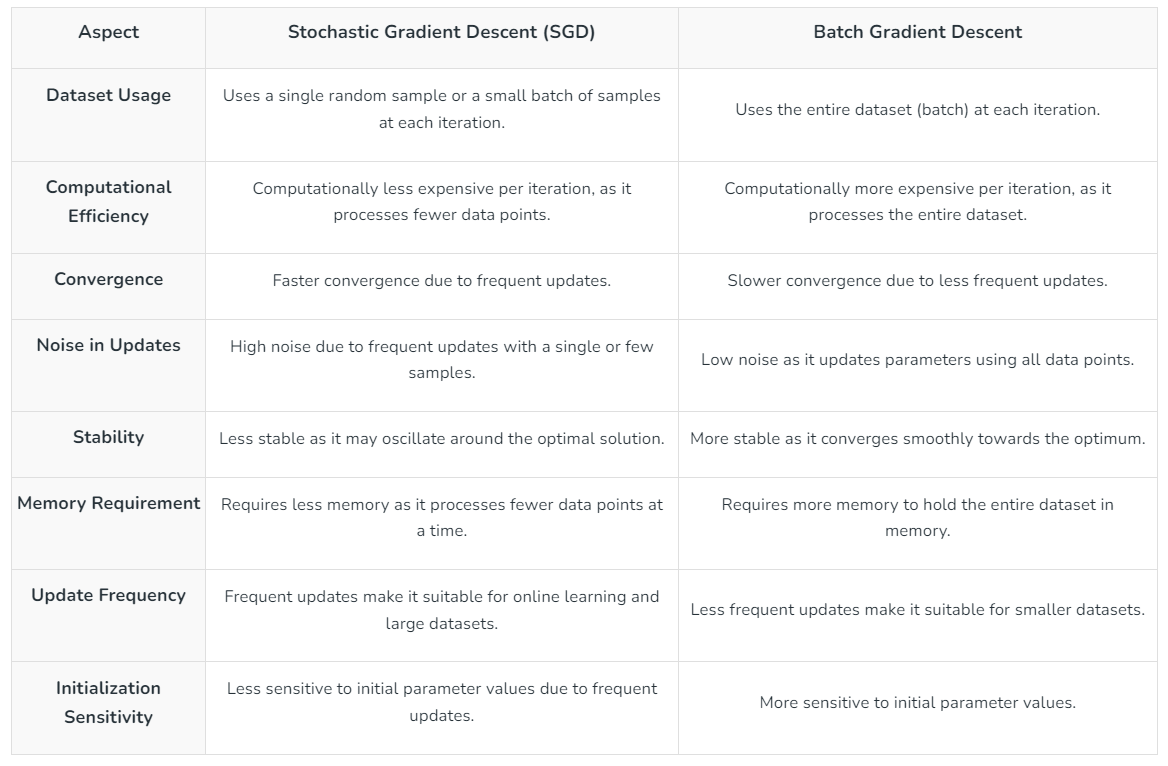 

In [2]:
import numpy as np

class SGD:
    def __init__(self, lr=0.01, epochs=1000, batch_size=32, tol=1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.weights = None
        self.bias = None

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def gradient(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        error = y_pred - y_batch
        gradient_weights = np.dot(X_batch.T, error) / X_batch.shape[0]
        gradient_bias = np.mean(error)
        return gradient_weights, gradient_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
                self.weights -= self.learning_rate * gradient_weights
                self.bias -= self.learning_rate * gradient_bias

            if epoch % 100 == 0:
                y_pred = self.predict(X)
                loss = self.mean_squared_error(y, y_pred)
                print(f"Epoch {epoch}: Loss {loss}")

            if np.linalg.norm(gradient_weights) < self.tolerance:
                print("Convergence reached.")
                break

        return self.weights, self.bias

In [3]:
# Create random dataset with 100 rows and 5 columns
X = np.random.randn(100, 5)
# create corresponding target value by adding random
# noise in the dataset
y = np.dot(X, np.array([1, 2, 3, 4, 5]))\
    + np.random.randn(100) * 0.1
# Create an instance of the SGD class
model = SGD(lr=0.01, epochs=1000,
            batch_size=32, tol=1e-3)
w,b=model.fit(X,y)
# Predict using predict method from model
y_pred = w*X+b
#y_pred

Epoch 0: Loss 45.40138889444322
Epoch 100: Loss 0.1529298642147217
Epoch 200: Loss 0.011930677588516262
Epoch 300: Loss 0.011281372894563903
Epoch 400: Loss 0.011307007108466754
Epoch 500: Loss 0.011280664151921051
Epoch 600: Loss 0.011287463890278017
Epoch 700: Loss 0.011283576401137434
Epoch 800: Loss 0.011290933073615566
Epoch 900: Loss 0.011281612063977396
